## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

## Load dataset

In [2]:
data = pd.read_csv('~/Downloads/courses/wasp-as-1/activity_recognition/sensorLog_20200323T171331.txt', sep='\t', lineterminator='\n', names=['timestamp', 'sensor', 'x', 'y', 'z', '4th'])

In [3]:
data.head()

,timestamp,sensor,x,y,z,4th
0,4875238415,GYR,0.089401,0.196136,1.079819,NaN
1,4875238425,GYR,0.098984,0.189743,1.092590,NaN
2,4875238435,ORI,0.960282,0.076975,-0.135791,-0.23129
3,4875238432,ACC,2.453873,2.295441,10.366028,NaN
4,4875238435,GYR,0.162903,0.095993,1.185272,NaN


In [4]:
data.shape

(14738, 6)

## Use accelerometer and gyroscope data (ACC, GYR)

In [5]:
data.drop(data[data.sensor == "ORI"].index, inplace=True)
data.drop(data[data.sensor == "GPS"].index, inplace=True)
data.drop('4th', axis=1, inplace=True)

In [6]:
data.shape

(9796, 5)

In [7]:
data

,timestamp,sensor,x,y,z
0,4875238415,GYR,0.089401,0.196136,1.079819
1,4875238425,GYR,0.098984,0.189743,1.092590
3,4875238432,ACC,2.453873,2.295441,10.366028
4,4875238435,GYR,0.162903,0.095993,1.185272
5,4875238445,GYR,0.243866,0.007584,1.308838
...,...,...,...,...,...
14731,4875287654,GYR,0.017258,0.384186,0.018677
14732,4875287661,ACC,4.589508,3.815765,7.023712
14733,4875287664,GYR,-0.116974,0.407623,0.004837
14735,4875287674,GYR,-0.191544,0.598312,0.003769


## Plot x, y, z coordinates for visualization

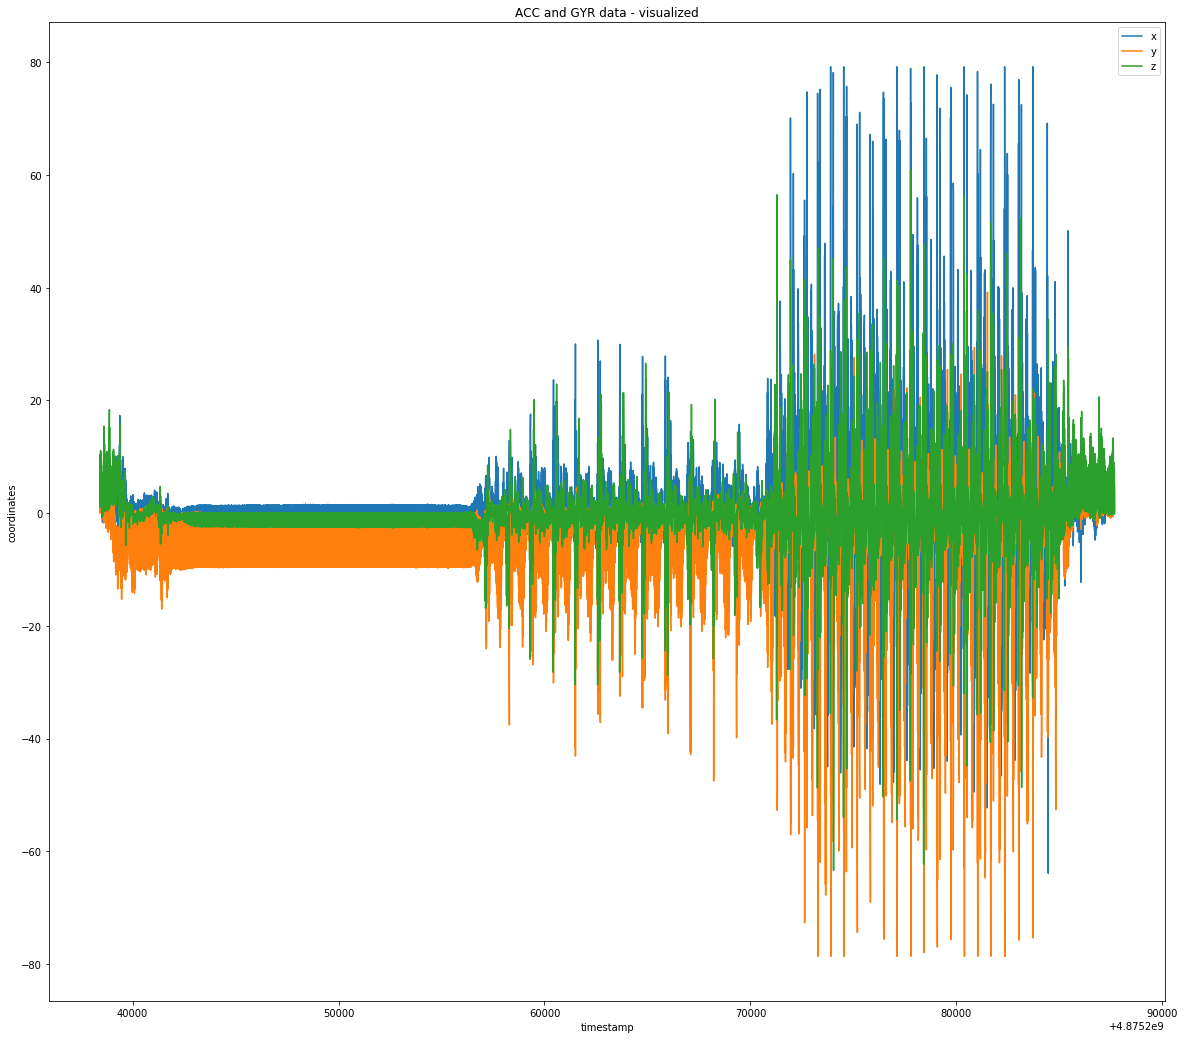

In [8]:
plt.figure(figsize=(20, 18))
plt.plot(data.timestamp, data.x, label='x')
plt.plot(data.timestamp, data.y, label='y')
plt.plot(data.timestamp, data.z, label='z')

plt.xlabel('timestamp')
plt.ylabel('coordinates')

plt.title("ACC and GYR data - visualized")

plt.legend()

## Prune dataset from the ends to remove noise 

In [9]:
data.drop(data.head(1000).index,inplace=True) # drop first n rows
data.drop(data.tail(500).index,inplace=True) # drop last n rows

In [10]:
data.shape

(8296, 5)

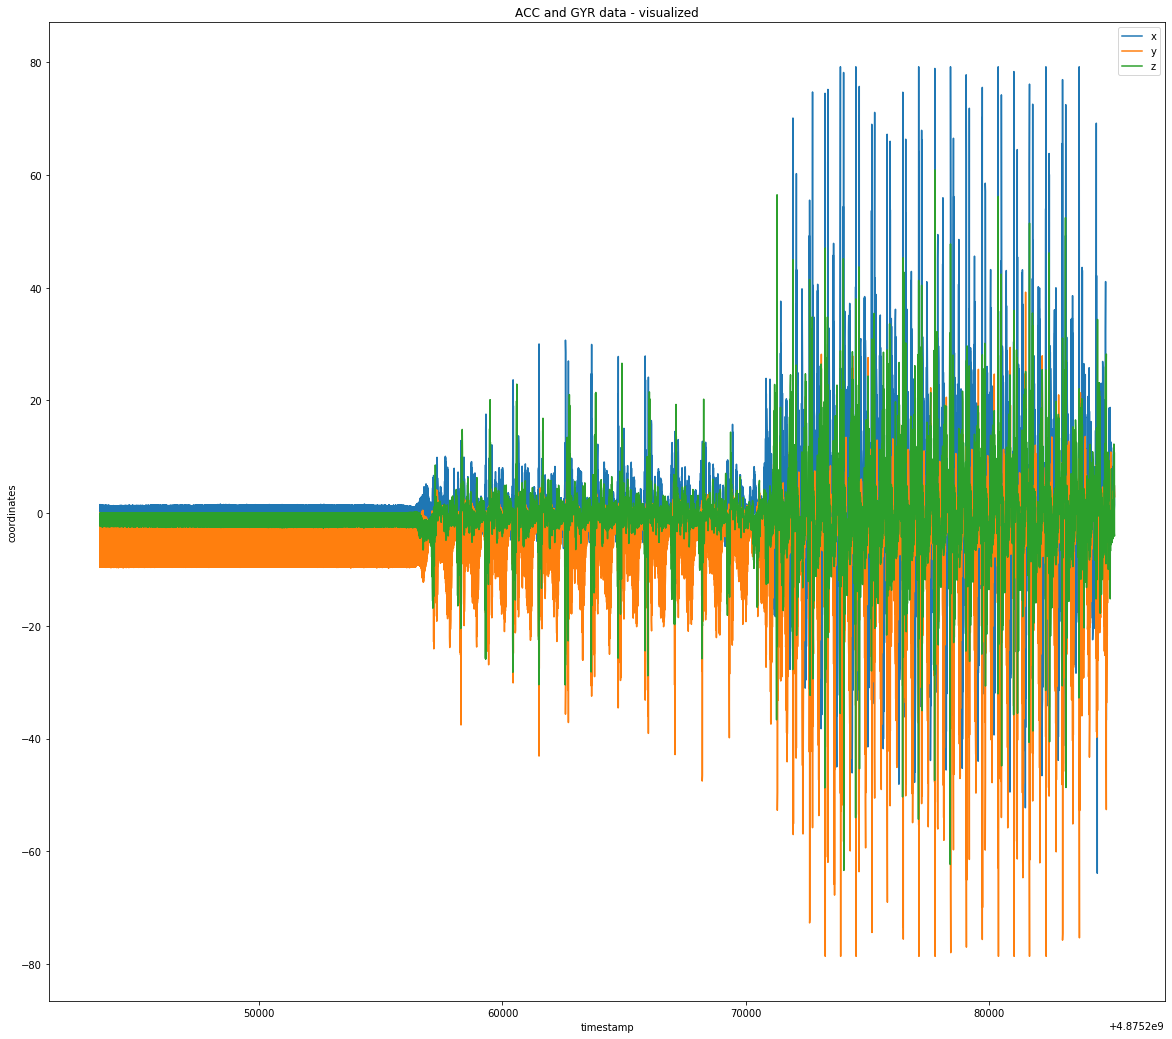

In [11]:
plt.figure(figsize=(20, 18))
plt.plot(data.timestamp, data.x, label='x')
plt.plot(data.timestamp, data.y, label='y')
plt.plot(data.timestamp, data.z, label='z')

plt.xlabel('timestamp')
plt.ylabel('coordinates')

plt.title("ACC and GYR data - visualized")

plt.legend()

## Separate GYR and ACC data to calculate individual features

### Features calculated by grouping 100 rows together to find mean, min, max along x, y, z

In [12]:
df_acc = data[(data['sensor'] == 'ACC')]
df_gyr = data[(data['sensor'] == 'GYR')]

### Accelerometer data

In [13]:
df_acc

,timestamp,sensor,x,y,z
1502,4875243450,ACC,1.491409,-9.558243,-2.208328
1506,4875243460,ACC,1.453094,-9.613312,-2.280151
1509,4875243470,ACC,1.333389,-9.606125,-2.328033
1512,4875243481,ACC,1.299866,-9.594162,-2.308884
1515,4875243491,ACC,1.302261,-9.589371,-2.294510
...,...,...,...,...,...
13974,4875285117,ACC,3.861664,-0.958267,3.542557
13975,4875285127,ACC,10.982025,0.585983,10.399551
13979,4875285137,ACC,10.249405,4.275452,12.255051
13982,4875285147,ACC,6.777801,5.252289,9.896759


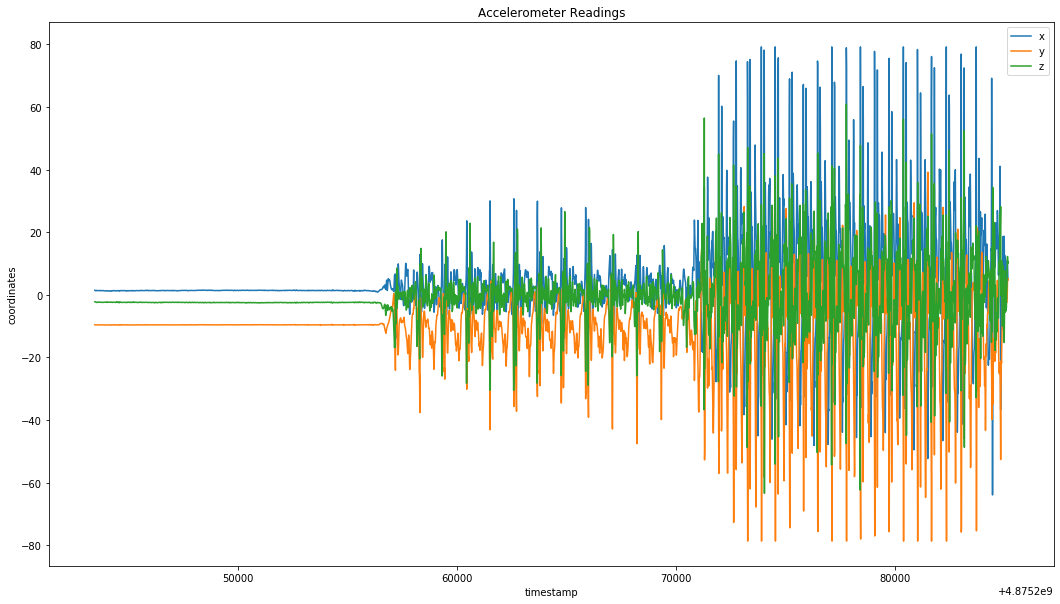

In [14]:
plt.figure(figsize=(18, 10))
plt.plot(df_acc.timestamp, df_acc.x, label='x')
plt.plot(df_acc.timestamp, df_acc.y, label='y')
plt.plot(df_acc.timestamp, df_acc.z, label='z')

plt.xlabel('timestamp')
plt.ylabel('coordinates')

plt.title("Accelerometer Readings")

plt.legend()

In [15]:
df_acc_features = df_acc.groupby(np.arange(len(df_acc))//100).mean().rename({'x': 'acc_mean_x', 'y': 'acc_mean_y', 'z': 'acc_mean_z'}, axis=1)

In [16]:
df_acc_features = pd.concat([df_acc_features, df_acc.groupby(np.arange(len(df_acc))//100).min().rename({'x': 'acc_min_x', 'y': 'acc_min_y', 'z': 'acc_min_z'}, axis=1)], axis=1)

In [17]:
df_acc_features = pd.concat([df_acc_features, df_acc.groupby(np.arange(len(df_acc))//100).max().rename({'x': 'acc_max_x', 'y': 'acc_max_y', 'z': 'acc_max_z'}, axis=1)], axis=1)

In [18]:
df_acc_features.drop('timestamp', axis=1, inplace=True)
df_acc_features.drop('sensor', axis=1, inplace=True)
df_acc_features.head()

,acc_mean_x,acc_mean_y,acc_mean_z,acc_min_x,acc_min_y,acc_min_z,acc_max_x,acc_max_y,acc_max_z
0,1.316871,-9.603567,-2.356046,1.180160,-9.680344,-2.462112,1.491409,-9.529510,-2.196350
1,1.331260,-9.597822,-2.380441,1.235229,-9.661194,-2.495621,1.393250,-9.534302,-2.225082
2,1.372775,-9.582524,-2.421071,1.302261,-9.637253,-2.555481,1.465073,-9.529510,-2.332825
3,1.371364,-9.587814,-2.396770,1.242416,-9.627670,-2.536331,1.455490,-9.539093,-2.301697
4,1.428130,-9.568613,-2.433186,1.283112,-9.632462,-2.548294,1.553665,-9.510361,-2.313660


### Gyroscope data

In [19]:
df_gyr

,timestamp,sensor,x,y,z
1503,4875243453,GYR,-0.024582,0.039536,-0.014221
1507,4875243463,GYR,-0.016068,0.065109,-0.014221
1508,4875243473,GYR,-0.010742,0.062973,-0.016342
1513,4875243484,GYR,-0.010742,0.045929,-0.013153
1516,4875243494,GYR,-0.009674,0.026749,-0.008896
...,...,...,...,...,...
13972,4875285120,GYR,0.163193,2.609528,-2.521973
13976,4875285130,GYR,-0.254379,3.387161,-2.207718
13980,4875285140,GYR,-0.115906,4.767746,-2.794678
13983,4875285150,GYR,0.555222,4.746445,-3.468994


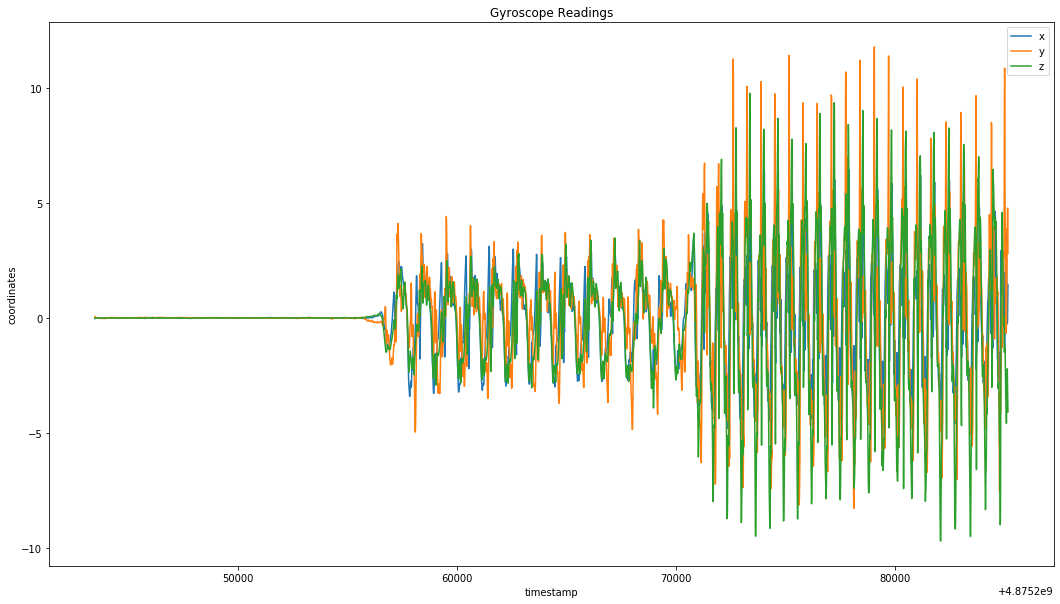

In [20]:
plt.figure(figsize=(18, 10))
plt.plot(df_gyr.timestamp, df_gyr.x, label='x')
plt.plot(df_gyr.timestamp, df_gyr.y, label='y')
plt.plot(df_gyr.timestamp, df_gyr.z, label='z')

plt.xlabel('timestamp')
plt.ylabel('coordinates')

plt.title("Gyroscope Readings")

plt.legend()

In [21]:
df_gyr_features = df_gyr.groupby(np.arange(len(df_gyr))//100).mean().rename({'x': 'gyr_mean_x', 'y': 'gyr_mean_y', 'z': 'gyr_mean_z'}, axis=1)

In [22]:
df_gyr_features = pd.concat([df_gyr_features, df_gyr.groupby(np.arange(len(df_gyr))//100).min().rename({'x': 'gyr_min_x', 'y': 'gyr_min_y', 'z': 'gyr_min_z'}, axis=1)], axis=1)

In [23]:
df_gyr_features = pd.concat([df_gyr_features, df_gyr.groupby(np.arange(len(df_gyr))//100).max().rename({'x': 'gyr_max_x', 'y': 'gyr_max_y', 'z': 'gyr_max_z'}, axis=1)], axis=1)

In [24]:
df_gyr_features.drop('timestamp', axis=1, inplace=True)
df_gyr_features.drop('sensor', axis=1, inplace=True)

In [25]:
df_gyr_features.head()

,gyr_mean_x,gyr_mean_y,gyr_mean_z,gyr_min_x,gyr_min_y,gyr_min_z,gyr_max_x,gyr_max_y,gyr_max_z
0,-0.003196,0.001925,-0.003243,-0.024582,-0.030762,-0.016342,0.009506,0.065109,0.011353
1,-0.003750,0.004183,-0.002432,-0.018188,-0.015854,-0.007828,0.007370,0.024628,0.006027
2,-0.004890,0.014229,0.000891,-0.019257,-0.007339,-0.011017,0.009506,0.035278,0.010284
3,-0.001192,0.008839,0.000347,-0.013931,-0.017990,-0.013153,0.011627,0.032089,0.010284
4,-0.005071,0.003512,-0.007035,-0.019257,-0.010529,-0.017410,0.007370,0.019302,0.001770


## Concatenate dataframes with features

In [26]:
sensor_features_df = pd.concat([df_acc_features, df_gyr_features], axis=1)

In [27]:
sensor_features_df.head()

,acc_mean_x,acc_mean_y,acc_mean_z,acc_min_x,acc_min_y,acc_min_z,acc_max_x,acc_max_y,acc_max_z,gyr_mean_x,gyr_mean_y,gyr_mean_z,gyr_min_x,gyr_min_y,gyr_min_z,gyr_max_x,gyr_max_y,gyr_max_z
0,1.316871,-9.603567,-2.356046,1.180160,-9.680344,-2.462112,1.491409,-9.529510,-2.196350,-0.003196,0.001925,-0.003243,-0.024582,-0.030762,-0.016342,0.009506,0.065109,0.011353
1,1.331260,-9.597822,-2.380441,1.235229,-9.661194,-2.495621,1.393250,-9.534302,-2.225082,-0.003750,0.004183,-0.002432,-0.018188,-0.015854,-0.007828,0.007370,0.024628,0.006027
2,1.372775,-9.582524,-2.421071,1.302261,-9.637253,-2.555481,1.465073,-9.529510,-2.332825,-0.004890,0.014229,0.000891,-0.019257,-0.007339,-0.011017,0.009506,0.035278,0.010284
3,1.371364,-9.587814,-2.396770,1.242416,-9.627670,-2.536331,1.455490,-9.539093,-2.301697,-0.001192,0.008839,0.000347,-0.013931,-0.017990,-0.013153,0.011627,0.032089,0.010284
4,1.428130,-9.568613,-2.433186,1.283112,-9.632462,-2.548294,1.553665,-9.510361,-2.313660,-0.005071,0.003512,-0.007035,-0.019257,-0.010529,-0.017410,0.007370,0.019302,0.001770


## Use KMeans to cluster data - unsupervised learning

In [28]:
kmeans = KMeans(n_clusters=3).fit(sensor_features_df)
labels = kmeans.labels_
# centroids = kmeans.cluster_centers_
# inertia = kmeans.inertia_
# print(labels)
# print(centroids)
# print(inertia)

In [29]:
sensor_features_df['labels'] = labels

In [30]:
sensor_features_df

,acc_mean_x,acc_mean_y,acc_mean_z,acc_min_x,acc_min_y,acc_min_z,acc_max_x,acc_max_y,acc_max_z,gyr_mean_x,gyr_mean_y,gyr_mean_z,gyr_min_x,gyr_min_y,gyr_min_z,gyr_max_x,gyr_max_y,gyr_max_z,labels
0,1.316871,-9.603567,-2.356046,1.180160,-9.680344,-2.462112,1.491409,-9.529510,-2.196350,-0.003196,0.001925,-0.003243,-0.024582,-0.030762,-0.016342,0.009506,0.065109,0.011353,2
1,1.331260,-9.597822,-2.380441,1.235229,-9.661194,-2.495621,1.393250,-9.534302,-2.225082,-0.003750,0.004183,-0.002432,-0.018188,-0.015854,-0.007828,0.007370,0.024628,0.006027,2
2,1.372775,-9.582524,-2.421071,1.302261,-9.637253,-2.555481,1.465073,-9.529510,-2.332825,-0.004890,0.014229,0.000891,-0.019257,-0.007339,-0.011017,0.009506,0.035278,0.010284,2
3,1.371364,-9.587814,-2.396770,1.242416,-9.627670,-2.536331,1.455490,-9.539093,-2.301697,-0.001192,0.008839,0.000347,-0.013931,-0.017990,-0.013153,0.011627,0.032089,0.010284,2
4,1.428130,-9.568613,-2.433186,1.283112,-9.632462,-2.548294,1.553665,-9.510361,-2.313660,-0.005071,0.003512,-0.007035,-0.019257,-0.010529,-0.017410,0.007370,0.019302,0.001770,2
5,1.428440,-9.567488,-2.446450,1.319031,-9.627670,-2.536331,1.539291,-9.507965,-2.356766,-0.001055,0.007250,0.003085,-0.013931,-0.024384,-0.012085,0.011627,0.023560,0.014542,2
6,1.436677,-9.561070,-2.461653,1.314240,-9.618103,-2.577026,1.536896,-9.500778,-2.363953,-0.003889,0.000337,-0.000962,-0.011810,-0.026505,-0.007828,0.006302,0.018234,0.007095,2
7,1.436390,-9.552188,-2.502498,1.342972,-9.613312,-2.589004,1.512955,-9.522339,-2.395065,0.000842,-0.001015,0.002531,-0.011810,-0.017990,-0.003555,0.018021,0.017166,0.013489,2
8,1.409407,-9.566171,-2.464981,1.319031,-9.627670,-2.569840,1.505768,-9.524735,-2.392670,0.000575,-0.001761,-0.000611,-0.013931,-0.023315,-0.009949,0.018021,0.016098,0.008163,2
9,1.404211,-9.569570,-2.448389,1.309448,-9.649231,-2.634491,1.558441,-9.476837,-2.359161,0.005474,-0.001484,0.002371,-0.011810,-0.030762,-0.012085,0.014832,0.040604,0.010284,2


## Plot (activity) labels vs time

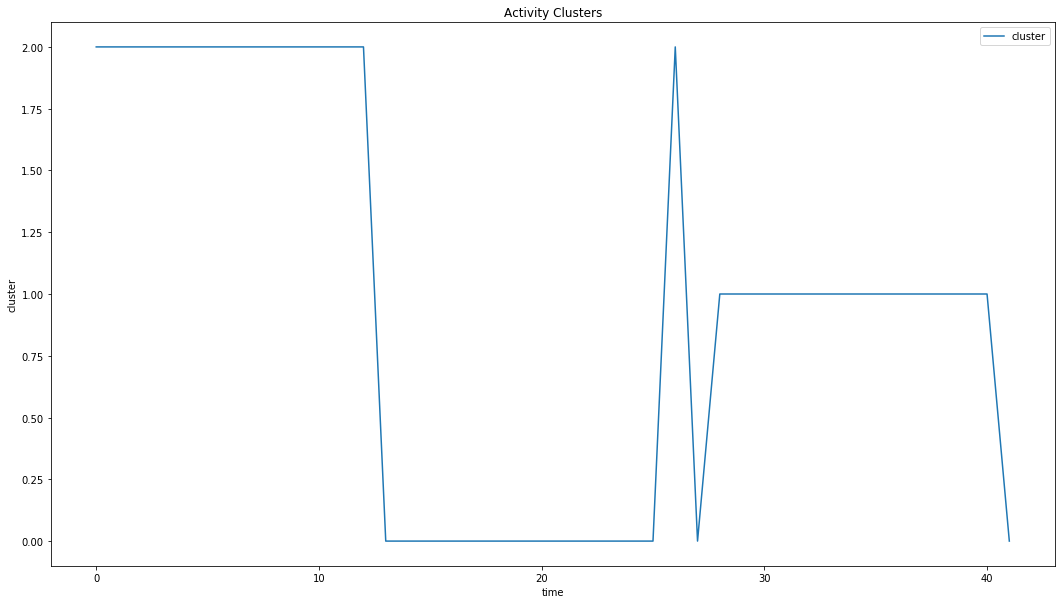

In [31]:
plt.figure(figsize=(18, 10))
plt.plot(sensor_features_df.index, sensor_features_df.labels, label='cluster')

plt.xlabel('time')
plt.ylabel('cluster')

plt.title("Activity Clusters")

plt.legend()